In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [4]:
Image_size=256
Batch_size=32
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "project AI",
    shuffle=True,
    image_size=(Image_size,Batch_size),
    batch_size=Batch_size
)

Found 2146 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

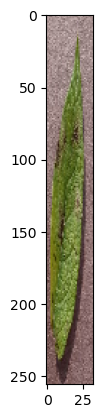

In [25]:
for image_batch, labels_batch in dataset.take(1):
        plt.imshow(image_batch[i].numpy().astype("uint8"))

In [26]:
EMPOCHS=10

# Splitting Data

In [27]:
trainsize=0.8
len(dataset)*trainsize

54.400000000000006

In [28]:
train_dataset=dataset.take(54)

In [29]:
test_ds=dataset.skip(54)

In [31]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [32]:
val_ds=test_ds.take(6)

In [33]:
test_ds=test_ds.skip(6)

In [35]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [37]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(Image_size, Image_size),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [38]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

# Making Model

In [41]:
CHANNELS=3
input_shape = (Batch_size, Image_size, Image_size, CHANNELS)
n_classes = 3

model = models.Sequential([ 
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [42]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Training

In [43]:
history = model.fit(
    train_dataset,
    batch_size=Batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30


54/54 [==============================] - 96s 2s/step - loss: 0.8919 - accuracy: 0.5295 - val_loss: 0.8915 - val_accuracy: 0.5521
Epoch 2/30
54/54 [==============================] - 83s 2s/step - loss: 0.6406 - accuracy: 0.7263 - val_loss: 0.6202 - val_accuracy: 0.6875
Epoch 3/30
54/54 [==============================] - 83s 2s/step - loss: 0.5100 - accuracy: 0.7940 - val_loss: 0.3982 - val_accuracy: 0.8021
Epoch 4/30
54/54 [==============================] - 83s 2s/step - loss: 0.3932 - accuracy: 0.8380 - val_loss: 0.3331 - val_accuracy: 0.8698
Epoch 5/30
54/54 [==============================] - 84s 2s/step - loss: 0.3030 - accuracy: 0.8843 - val_loss: 0.2143 - val_accuracy: 0.9271
Epoch 6/30
54/54 [==============================] - 63s 1s/step - loss: 0.2188 - accuracy: 0.9028 - val_loss: 0.2786 - val_accuracy: 0.8854
Epoch 7/30
54/54 [==============================] - 65s 1s/step - loss: 0.1796 - accuracy: 0.9306 - val_loss: 0.2727 - val_accuracy: 0.9062
Epoch 8/30
54/54 [

# Testing

In [44]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 2s 193ms/step - loss: 0.0622 - accuracy: 0.9823


In [45]:
scores

[0.06220560148358345, 0.982300877571106]

In [46]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 398ms/step
predicted label: Potato___Early_blight


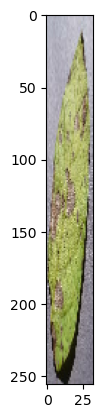

In [51]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# Store model in a file

In [53]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets
